<a href="https://colab.research.google.com/github/parth1614/QuantumComputing-Qiskit/blob/main/Teleportation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install qiskit

In [2]:
from qiskit import QuantumCircuit, Aer, assemble, execute

In [3]:
qc = QuantumCircuit(3,3)
qc.x(0)
qc.barrier()

In [4]:
qc.h(1)
qc.cx(1,2)
qc.draw()

┌───┐ ░           
q_0: ┤ X ├─░───────────
     └───┘ ░ ┌───┐     
q_1: ──────░─┤ H ├──■──
           ░ └───┘┌─┴─┐
q_2: ──────░──────┤ X ├
           ░      └───┘
c: 3/══════════════════

In [5]:
qc.cx(0,1)
qc.h(0)

In [6]:
qc.barrier()
qc.measure([0,1],[0,1])

In [7]:
qc.draw()

┌───┐ ░                ┌───┐ ░ ┌─┐   
q_0: ┤ X ├─░─────────────■──┤ H ├─░─┤M├───
     └───┘ ░ ┌───┐     ┌─┴─┐└───┘ ░ └╥┘┌─┐
q_1: ──────░─┤ H ├──■──┤ X ├──────░──╫─┤M├
           ░ └───┘┌─┴─┐└───┘      ░  ║ └╥┘
q_2: ──────░──────┤ X ├───────────░──╫──╫─
           ░      └───┘           ░  ║  ║ 
c: 3/════════════════════════════════╩══╩═
                                     0  1

In [8]:
qc.barrier()
qc.cx(1,2)
qc.cz(0,2)
qc.draw()

┌───┐ ░                ┌───┐ ░ ┌─┐    ░         
q_0: ┤ X ├─░─────────────■──┤ H ├─░─┤M├────░───────■─
     └───┘ ░ ┌───┐     ┌─┴─┐└───┘ ░ └╥┘┌─┐ ░       │ 
q_1: ──────░─┤ H ├──■──┤ X ├──────░──╫─┤M├─░───■───┼─
           ░ └───┘┌─┴─┐└───┘      ░  ║ └╥┘ ░ ┌─┴─┐ │ 
q_2: ──────░──────┤ X ├───────────░──╫──╫──░─┤ X ├─■─
           ░      └───┘           ░  ║  ║  ░ └───┘   
c: 3/════════════════════════════════╩══╩════════════
                                     0  1

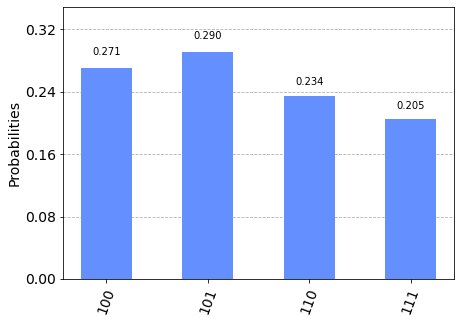

In [9]:
qc.measure(2,2)
sim = Aer.get_backend('qasm_simulator')
result = execute(qc,backend=sim,shots=1024).result()
counts = result.get_counts()
from qiskit.visualization import plot_histogram
plot_histogram(counts)


In [10]:
qc.draw()

┌───┐ ░                ┌───┐ ░ ┌─┐    ░            
q_0: ┤ X ├─░─────────────■──┤ H ├─░─┤M├────░───────■────
     └───┘ ░ ┌───┐     ┌─┴─┐└───┘ ░ └╥┘┌─┐ ░       │    
q_1: ──────░─┤ H ├──■──┤ X ├──────░──╫─┤M├─░───■───┼────
           ░ └───┘┌─┴─┐└───┘      ░  ║ └╥┘ ░ ┌─┴─┐ │ ┌─┐
q_2: ──────░──────┤ X ├───────────░──╫──╫──░─┤ X ├─■─┤M├
           ░      └───┘           ░  ║  ║  ░ └───┘   └╥┘
c: 3/════════════════════════════════╩══╩═════════════╩═
                                     0  1             2

In [11]:
print(counts)

{'111': 210, '100': 277, '101': 297, '110': 240}
